# RNN

In [1]:
!pip install yfinance --quiet
# FinanceDataReader?

     |████████████████████████████████| 62 kB 1.3 MB/s 


In [2]:
import yfinance as yf

In [3]:
# investpy
# https://investpy.readthedocs.io/_info/installation.html
# finance data reader
# https://financedata.github.io/posts/finance-data-reader-users-guide.html
# pyubpit (4대 거래소?) / pycoingecko
history = yf.Ticker('NFLX').history(period='max')
history.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,104790000,0,0.0
2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,11104800,0,0.0
2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,6609400,0,0.0
2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,6757800,0,0.0
2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,10154200,0,0.0


In [4]:
# 시간 범위 : 2015-01-01 / 2020-12-31
# 컬럼 : Date, Open, High, Low, Volume, Close
history.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [5]:
# Date 인덱스에서 뽑아내기
history.reset_index(inplace=True)
history

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,104790000,0,0.0
1,2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,11104800,0,0.0
2,2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,6609400,0,0.0
3,2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,6757800,0,0.0
4,2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,10154200,0,0.0
...,...,...,...,...,...,...,...,...
5158,2022-11-16 00:00:00-05:00,309.940002,310.489990,303.609985,306.019989,8038600,0,0.0
5159,2022-11-17 00:00:00-05:00,294.720001,299.820007,291.000000,295.279999,9838200,0,0.0
5160,2022-11-18 00:00:00-05:00,297.329987,298.000000,287.000000,287.980011,8392100,0,0.0
5161,2022-11-21 00:00:00-05:00,291.000000,291.869995,282.660004,285.049988,7256500,0,0.0


In [6]:
import pandas as pd

In [7]:
# 시간 없애고 날짜만 남기기
# dt.date => str (문자열)
# 시간을 없애고 -> datetime => date (시간 X) => date()

history.Date = pd.to_datetime(history.Date.dt.date)
history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,0,0.0
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,0,0.0
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,0,0.0
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,0,0.0
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,0,0.0


In [8]:
history.drop(["Dividends", "Stock Splits"], axis=1, inplace=True)
history

,Date,Open,High,Low,Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200
...,...,...,...,...,...,...
5158,2022-11-16,309.940002,310.489990,303.609985,306.019989,8038600
5159,2022-11-17,294.720001,299.820007,291.000000,295.279999,9838200
5160,2022-11-18,297.329987,298.000000,287.000000,287.980011,8392100
5161,2022-11-21,291.000000,291.869995,282.660004,285.049988,7256500


In [9]:
# between (A, B) 날짜만 표시
df = history[history['Date'].between('2015-01-01', '2018-12-31')
].reset_index(drop=True)
df

,Date,Open,High,Low,Close,Volume
0,2015-01-02,49.151428,50.331429,48.731430,49.848572,13475000
1,2015-01-05,49.258572,49.258572,47.147144,47.311428,18165000
2,2015-01-06,47.347141,47.639999,45.661430,46.501431,16037700
3,2015-01-07,47.347141,47.421429,46.271427,46.742859,9849700
4,2015-01-08,47.119999,47.835712,46.478573,47.779999,9601900
...,...,...,...,...,...,...
1001,2018-12-24,242.000000,250.649994,233.679993,233.880005,9547600
1002,2018-12-26,233.919998,254.500000,231.229996,253.669998,14402700
1003,2018-12-27,250.110001,255.589996,240.100006,255.570007,12235200
1004,2018-12-28,257.940002,261.910004,249.800003,256.079987,10992800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


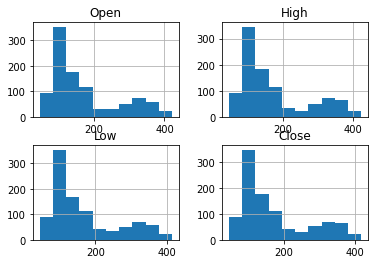

In [10]:
# 시간 순서대로 주가를 분석해서 -> 다음날의 종가(Close)를 예측
# 입력 -> Open(개장가) High(최고가) Low(최저가) => 정답데이터 종가
import matplotlib.pyplot as plt

df_used = df[['Open', 'High', 'Low']] # 입력 : 개장가 / 최고가 / 최저가
df_used['Close'] = df['Close'] # 정답 : 종가
hist = df_used.hist()
plt.show()

In [11]:
# Dataset 학습용 데이터셋 (Netflix)
import numpy as np
from torch.utils.data.dataset import Dataset

class Netflix(Dataset):
    def __init__(self): # 클래스를 통해서 객체를 생성할 때 어떤것을 포함할 것인가?
        # 데이터 정규화 -> range 벌어지면 학습이 어렵다 -> 0~1 줄여줘서 학습을 쉽게
        # Open, High, Low, (Close)
        self.data = df_used.drop('Close', axis=1).values # 값만 있는 배열
        self.data = self.data / np.max(self.data) # np.max 배열에서 가장 큰 값
        # Close
        self.label = df_used['Close'].values
        self.label = self.label / np.max(self.label) # (0~1)
    
    # 사용가능한 배치 개수를 반환하는 __len__()
    def __len__(self):
        return len(self.data) - 30 # 사용가능한 배치 계수
        # 30일치가 묶여서 batch 1-30 

    # 30일치 데이터를 읽어오는 함수
    def __getitem__(self, i): # 0 ~ len-1
        data = self.data[i:i+30] # 입력데이터(시가,고가,저가,날짜)
        label = self.label[i+30] # 종가
        return data, label

In [12]:
#@title RNN 모델 정의

import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        # RNN 층 정의
        # Open, High, Low
        self.rnn = nn.RNN(input_size=3, hidden_size=8,
                          num_layers=5, # RNN층을 얼마나 쌓을까? 3? 5?
                          # 너무 많으면 기울기 소실, 너무 적으면 기울기 폭발
                          batch_first=True) # Batch 차원 (30, 8)
        # FC, MLP => 분류, 예측
        # 주가를 예측하는 MLP층 정의
        self.fc1 = nn.Linear(in_features=240, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=1)

        self.relu = nn.ReLU()
    
    def forward(self, x, h0):
        x, hn = self.rnn(x, h0) # RNN층의 출력
        # x -> 층을 거쳐 나온 결과 (출력층) / hn은 모든 RNN층의 은닉 상태 (누적 가중치)
        # 2차원 -> 1차원... (MLP층의 입력으로 사용되게 모양 변경)
        x = torch.reshape(x, (x.shape[0], -1))

        # MLP 층을 사용해서 값 예측
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        # 출력층
        x = torch.flatten(x)

        return x

In [13]:
from tqdm.notebook import tqdm

from torch.optim.adam import Adam
from torch.utils.data.dataloader import DataLoader

device = 'cuda' if torch.cuda.is_available() else "cpu"

model = RNN().to(device)
dataset = Netflix()

In [14]:
loader = DataLoader(dataset, batch_size=32)

In [15]:
optim = Adam(params=model.parameters(), lr=0.0001)

In [16]:
for epoch in range(200):
    iterator = tqdm(loader)
    for data, label in iterator:
        optim.zero_grad()
        # 초기 은닉 상태
        h0 = torch.zeros(5, data.shape[0], 8).to(device)
        # 모델의 예측값
        preds = model(data.type(torch.FloatTensor).to(device), h0)
        # 손실 계산
        loss = nn.MSELoss()(preds, label.type(torch.FloatTensor).to(device))
        loss.backward() # 역전파
        optim.step() # 최적화

        iterator.set_description(f"epoch{epoch} loss:{loss.item()}")

torch.save(model.state_dict(), "./rnn.pth")

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

In [17]:
import matplotlib.pyplot as plt

loader = DataLoader(dataset, batch_size=1) # 예측값을 위한 데이터 로더

preds = [] # 예측값 저장할 리스트
total_loss = 0

with torch.no_grad(): 
    model.load_state_dict(torch.load('rnn.pth', map_location=device))

    for data, label in loader:
        h0 = torch.zeros(5, data.shape[0], 8).to(device)

        pred = model(data.type(torch.FloatTensor).to(device), h0)
        preds.append(pred.item()) # 실제값과 비교를 위해서 예측값을 저장

        # 손실 계산
        loss = nn.MSELoss()(pred, label.type(torch.FloatTensor).to(device))
        total_loss += loss/len(loader) # 손실의 평균치

In [18]:
total_loss.item()

0.003378454828634858

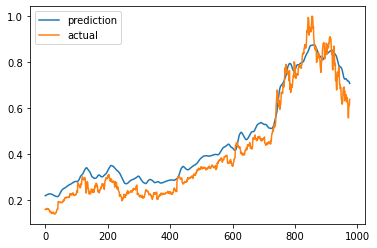

In [19]:
plt.plot(preds, label="prediction")
plt.plot(dataset.label[30:], label="actual")
plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
from torch.optim.adam import Adam
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=3,
                          hidden_size=8,
                          num_layers=5,
                          batch_first=True)
        self.fc1 = nn.Linear(in_features=240, out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x, h0):
        x, hn = self.rnn(x, h0)
        x = torch.reshape(x, (x.shape[0], -1))
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = torch.flatten(x)
        return x

def use_rnn(dataset):
    device = 'cuda' if torch.cuda.is_available() else "cpu"
    model = RNN().to(device)
    # dataset = Netflix()
    train_loader = DataLoader(dataset, batch_size=32)
    optim = Adam(params=model.parameters(), lr=0.0001)
    learn(model, train_loader, optim)
    pred_loader = DataLoader(dataset, batch_size=1)
    preds = predict(model, pred_loader)
    visualize(preds, dataset)

def learn(model, loader, optim):
    for epoch in range(200):
        iterator = tqdm(loader)
        for data, label in iterator:
            optim.zero_grad()
            h0 = torch.zeros(5, data.shape[0], 8).to(device)
            preds = model(data.type(torch.FloatTensor).to(device), h0)
            loss = nn.MSELoss()(preds, label.type(torch.FloatTensor).to(device))
            loss.backward()
            optim.step()
            iterator.set_description(f"epoch{epoch} loss:{loss.item()}")
    torch.save(model.state_dict(), "./rnn.pth")

def predict(model, loader):
    preds = [] # 예측값 저장할 리스트
    total_loss = 0
    with torch.no_grad(): 
        model.load_state_dict(torch.load('rnn.pth', map_location=device))
        for data, label in loader:
            h0 = torch.zeros(5, data.shape[0], 8).to(device)
            pred = model(data.type(torch.FloatTensor).to(device), h0)
            preds.append(pred.item())
            loss = nn.MSELoss()(pred, label.type(torch.FloatTensor).to(device))
            total_loss += loss/len(loader)
    print(f"total_loss : {total_loss.item()}")
    return preds

def visualize(preds, dataset):
    plt.plot(preds, label="prediction")
    plt.plot(dataset.label[30:], label="actual")
    plt.legend()
    plt.show()

use_rnn(Netflix())

In [21]:
# Dataset 학습용 데이터셋 (Netflix)
import numpy as np
from torch.utils.data.dataset import Dataset
import yfinance as yf
import pandas as pd

class Stock(Dataset):
    def __init__(self, ticker, start_date, end_date):
        df = yf.Ticker(ticker).history(period='max').reset_index()
        df.Date = pd.to_datetime(df.Date.dt.date) # 날짜만 끊어줌
        # yyyy-MM-dd
        df2 = df[df['Date'].between(start_date, end_date)].reset_index(drop=True)

        # 데이터 정규화
        self.data = df2[['Open', 'High', 'Low']].values
        self.data = self.data / np.max(self.data) # np.max 배열에서 가장 큰 값

        self.label = df2['Close'].values
        self.label = self.label / np.max(self.label)
    
    # 사용가능한 배치 개수를 반환하는 __len__()
    def __len__(self):
        return len(self.data) - 30 # 사용가능한 배치 계수
        # 30일치가 묶여서 batch 

    # 30일치 데이터를 읽어오는 함수
    def __getitem__(self, i): # 0 ~ len-1
        data = self.data[i:i+30] # 입력데이터(시가,고가,저가,날짜)
        label = self.label[i+30] # 종가
        return data, label

In [ ]:
use_rnn(Stock('AAPL', '2001-01-01', '2021-12-31'))

In [ ]:
use_rnn(Stock('TSLA', '2021-05-21', '2021-11-21'))

In [ ]:
use_rnn(Stock('O', '2019-11-21', '2021-11-21'))